In [1]:
train_dir = 'data/dogs-vs-cats/train'
test_dir = 'data/dogs-vs-cats/test'

In [2]:
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation ='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D (pool_size=(2,2)))
model.add(layers.Conv2D(64, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D (pool_size=(2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D (pool_size=(2,2)))
model.add(layers.Conv2D(128, (3,3), activation ='relu'))
model.add(layers.MaxPooling2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation ='relu'))
model.add(layers.Dense(1, activation ='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [5]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

modelpath = 'model/dogs-vs-cats.hdf5'

checkpoint = ModelCheckpoint(filepath=modelpath, verbose=0, monitor='val_loss', save_best_only=True)

In [8]:
h = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[checkpoint, early_stopping])

Epoch 1/30
1000/1000 [==============================] - 125s 125ms/step - loss: 0.6575 - accuracy: 0.6003 - val_loss: 0.6072 - val_accuracy: 0.6512
Epoch 2/30
1000/1000 [==============================] - 135s 135ms/step - loss: 0.5289 - accuracy: 0.7349 - val_loss: 0.4489 - val_accuracy: 0.7832
Epoch 3/30
1000/1000 [==============================] - 131s 131ms/step - loss: 0.4459 - accuracy: 0.7901 - val_loss: 0.4826 - val_accuracy: 0.7658
Epoch 4/30
1000/1000 [==============================] - 122s 122ms/step - loss: 0.3881 - accuracy: 0.8268 - val_loss: 0.3991 - val_accuracy: 0.8106
Epoch 5/30
1000/1000 [==============================] - 120s 120ms/step - loss: 0.3367 - accuracy: 0.8532 - val_loss: 0.3370 - val_accuracy: 0.8496
Epoch 6/30
1000/1000 [==============================] - 124s 124ms/step - loss: 0.3001 - accuracy: 0.8701 - val_loss: 0.3054 - val_accuracy: 0.8664
Epoch 7/30
1000/1000 [==============================] - 129s 129ms/step - loss: 0.2588 - accuracy: 0.8888 - val_

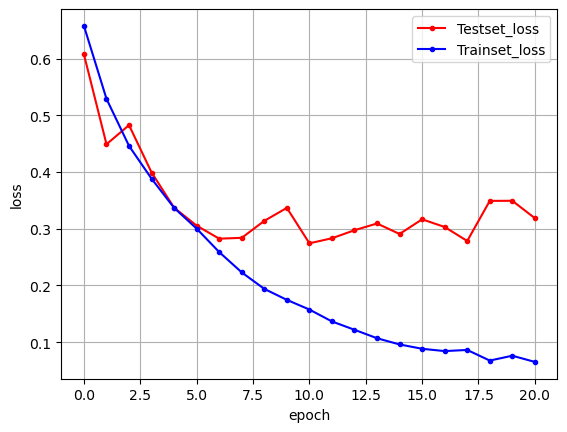

In [9]:
y_vloss = h.history['val_loss']
y_loss = h.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()